#**CHAPTER 4**
# **Training Models**

**Select and Train a Model**

At this stage, all previous steps such as data collection, exploration, splitting, and preprocessing have been completed. The dataset is now clean and ready for Machine Learning algorithms. The first model used is Linear Regression, which is simple and easy to interpret. After training the model, predictions are made on a few samples from the training data to verify that the model works. However, the predictions are not very accurate, indicating that the model is underfitting.


**The Normal Equation**

To find the value of θ that minimizes the cost function, there is a closed-form solution
—in other words, a mathematical equation that gives the result directly. This is called
the Normal Equation.

In [12]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [2]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_best

array([[4.15623239],
       [2.96797029]])

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.15623239],
       [10.09217296]])

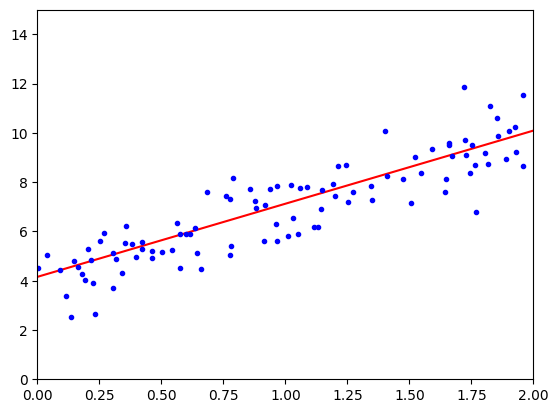

In [10]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_


(array([3.59455666]), array([[3.44203794]]))

In [14]:
lin_reg.predict(X_new)

array([[ 3.59455666],
       [10.47863254]])

In [15]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[7.23532333],
       [0.01835745]])

In [16]:
np.linalg.pinv(X_b).dot(y)

array([[7.23532333],
       [0.01835745]])

**Gradient Descent**

Gradient Descent is a generic optimization algorithm capable of finding optimal solu‐
tions to a wide range of problems. The general idea of Gradient Descent is to tweak
parameters iteratively in order to minimize a cost function.


**Batch Gradient Descent**

To implement Gradient Descent, you need to compute the gradient of the cost func‐
tion with regard to each model parameter θj. In other words, you need to calculate how much the cost function will change if you change θj just a little bit. This is called
a partial derivative. It is like asking “What is the slope of the mountain under my feet if I face east?” and then asking the same question facing north (and so on for all other
dimensions, if you can imagine a universe with more than three dimensions).

In [18]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

In [19]:
theta

array([[7.23532333],
       [0.01835745]])

**Stochastic Gradient Descent**

The main problem with Batch Gradient Descent is the fact that it uses the whole
training set to compute the gradients at every step, which makes it very slow when
the training set is large. At the opposite extreme, Stochastic Gradient Descent picks a
random instance in the training set at every step and computes the gradients based
only on that single instance. Obviously, working on a single instance at a time makes
the algorithm much faster because it has very little data to manipulate at every itera‐
tion. It also makes it possible to train on huge training sets, since only one instance
needs to be in memory at each iteration.

In [20]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

In [21]:
theta

array([[7.35920224],
       [0.09042625]])

In [22]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [23]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.57138692]), array([3.41492525]))

**Mini-batch Gradient Descent**

The last Gradient Descent algorithm we will look at is called Mini-batch Gradient
Descent. It is simple to understand once you know Batch and Stochastic Gradient
Descent: at each step, instead of computing the gradients based on the full training set
(as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD
computes the gradients on small random sets of instances called mini-batches. The
main advantage of Mini-batch GD over Stochastic GD is that you can get a perfor‐
mance boost from hardware optimization of matrix operations, especially when using
GPUs.

**Polynomial Regression**

What if your data is more complex than a straight line? Surprisingly, you can use a
linear model to fit nonlinear data. A simple way to do this is to add powers of each
feature as new features, then train a linear model on this extended set of features. This
technique is called Polynomial Regression.

In [24]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([1.45854986])

In [26]:
X_poly[0]

array([1.45854986, 2.12736768])

In [27]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.01682765]), array([[1.01570882, 0.50991278]]))

**Learning Curves**

If you perform high-degree Polynomial Regression, you will likely fit the training
data much better than with plain Linear Regression.

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

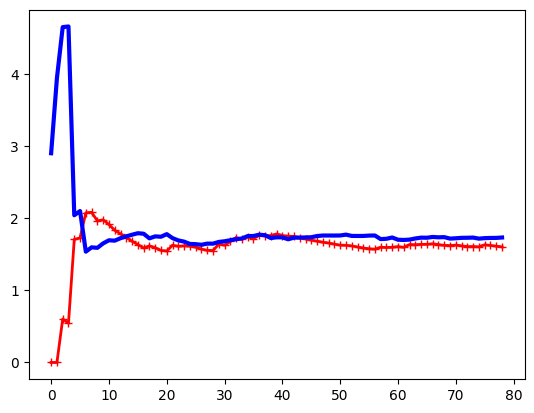

In [29]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

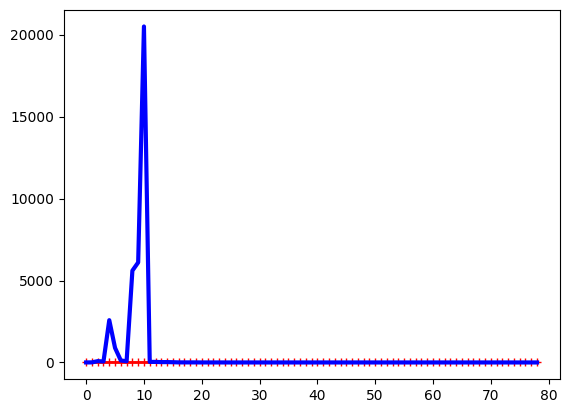

In [30]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
  ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
  ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

**Regularized Linear Models**

As we saw in Chapters 1 and 2, a good way to reduce overfitting is to regularize the
model (i.e., to constrain it): the fewer degrees of freedom it has, the harder it will be for it to overfit the data. A simple way to regularize a polynomial model is to reduce
the number of polynomial degrees.
For a linear model, regularization is typically achieved by constraining the weights of
the model. We will now look at Ridge Regression, Lasso Regression, and Elastic Net,
which implement three different ways to constrain the weights.

**Ridge Regression**

Ridge Regression (also called Tikhonov regularization) is a regularized version of Lin‐
ear Regression.

In [31]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([5.0154774])

In [32]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.99145797])

**Lasso Regression**

Least Absolute Shrinkage and Selection Operator Regression (usually simply called
Lasso Regression) is another regularized version of Linear Regression: just like Ridge
Regression, it adds a regularization term to the cost function, but it uses the l1 norm
of the weight vector instead of half the square of the l2 norm

In [33]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.97220268])

**Elastic Net**

Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The
regularization term is a simple mix of both Ridge and Lasso’s regularization terms,
and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge
Regression, and when r = 1, it is equivalent to Lasso Regression

In [34]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.97433138])

**Early Stopping**

A very different way to regularize iterative learning algorithms such as Gradient
Descent is to stop training as soon as the validation error reaches a minimum. This is
called early stopping.

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [42]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)


**Decision Boundaries**

Let’s use the iris dataset to illustrate Logistic Regression. This is a famous dataset that
contains the sepal and petal length and width of 150 iris flowers of three different
species: Iris setosa, Iris versicolor, and Iris virginica.

In [43]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [45]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(int)  # 1 if Iris virginica, else 0

In [46]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

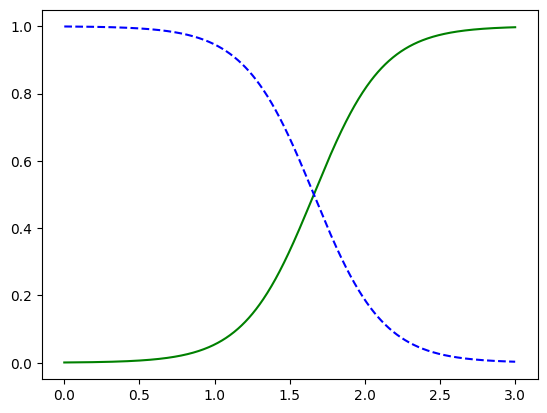

In [47]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")

In [48]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

**Softmax Regression**

The Logistic Regression model can be generalized to support multiple classes directly,
without having to train and combine multiple binary classifiers (as discussed in
Chapter 3). This is called Softmax Regression, or Multinomial Logistic Regression.

In [49]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, multi_class='multinomial')

In [50]:
softmax_reg.predict([[5, 2]])

array([2])

In [51]:
softmax_reg.predict_proba([[5, 2]])

array([[6.21626374e-07, 5.73689802e-02, 9.42630398e-01]])